# (sFigure11)-The Developmental Trajectories of Exhausted CD4+ T Cells.

In [17]:
import omicverse as ov 
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scvelo as scv

In [ ]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [28]:
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD4.uns['Subcelltype_colors'] = ['#BCCE85','#81B330','#249F3A','#0A5D2F','#89428F','#c69bc6','#F2BC1D','#6BBBDA','#31829F','#D41661','#4D4F95']
adata_CD4

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# Trajecotry of Treg

In [159]:
adata_Treg = adata_CD4[adata_CD4.obs['Subcelltype'].isin(['CD4.TNFRSF9+.Treg','CD4.LAG3+.Treg'])]
adata_Treg

View of AnnData object with n_obs × n_vars = 715 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [160]:
sc.pp.neighbors(adata_Treg, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(adata_Treg,resolution=1.5)
sc.tl.paga(adata_Treg)
sc.pl.paga(adata_Treg, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_Treg,init_pos='paga')
adata_Treg

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


AnnData object with n_obs × n_vars = 715 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/storage/zengjianyangLab/hulei/miniconda3/envs/omicverse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


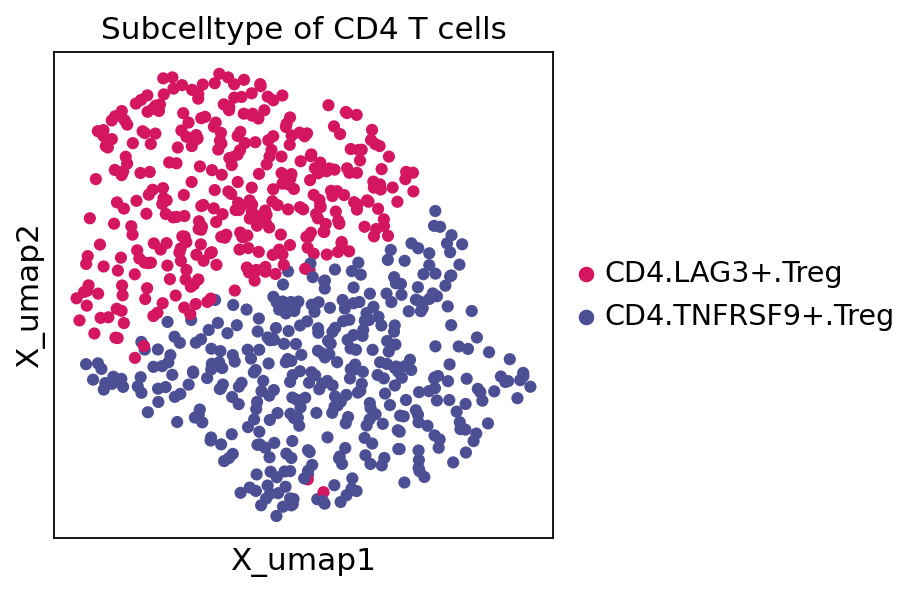

In [161]:
fig, ax = plt.subplots(figsize=(4,4))
adata_Treg.uns['Subcelltype_colors'] = ['#D41661', '#4D4F95']
sc.pl.embedding(adata_Treg,basis='X_umap',frameon='small',title='Subcelltype of CD4 T cells',
                color=['Subcelltype'],show=False,ax=ax,size=120)
plt.savefig("Gastric/Figure/sFigure11/sFigure11_A.png",dpi=300,bbox_inches = 'tight')

In [ ]:
v0 = ov.single.pyVIA(adata=adata_Treg,adata_key='X_scVI',adata_ncomps=80, basis='X_umap',too_big_factor=1,small_pop=50, #new parameter
                    resolution_parameter=0.4,clusters='Subcelltype',knn=30,random_seed=4,root_user=['CD4.TNFRSF9+.Treg'],)
v0.run()


v0.get_pseudotime()

In [ ]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='Subcelltype',draw_all_curves=False,cmap_pseudotime ='viridis')
fig.savefig("Gastric/Figure/sFigure11/sFigure11_B.png",dpi=300,bbox_inches = 'tight')

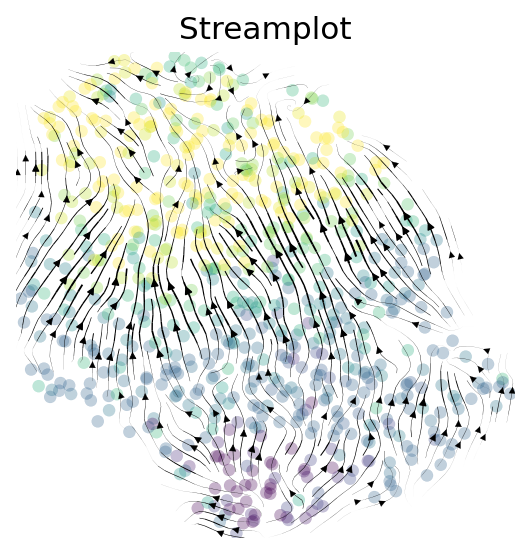

In [169]:
fig,ax=v0.plot_stream(basis='X_umap',density_grid=0.8, scatter_size=30, color_scheme='time', linewidth=0.5,
                             min_mass = 1, cutoff_perc = 5, scatter_alpha=0.3, marker_edgewidth=0.1,cmap_str='viridis',
                             density_stream = 2, smooth_transition=1, smooth_grid=0.5)
fig.savefig("Gastric/Figure/sFigure11/sFigure11_C.png",dpi=300,bbox_inches = 'tight')

In [167]:
v0.adata

AnnData object with n_obs × n_vars = 715 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'pt_via'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [170]:
gene_list_magic

['CCL20',
 'IL7R',
 'S100A10',
 'S100A11',
 'ANXA1',
 'IL17F',
 'IL17A',
 'CTLA4',
 'LAG3',
 'CSF1',
 'TOX2',
 'DUSP4',
 'TRBV27',
 'SIRPG']

In [ ]:
v0.adata = adata_Treg.raw.to_adata()
gene_list_magic = ['CTLA4','TNFRSF4','FOXP3','IL7R','IFNG','LAG3','C9orf16','IL10','TOX2','GEM','PDCD1','MAF','GZMA']
fig,ax=v0.plot_gene_trend_heatmap(gene_list=gene_list_magic,figsize=(6,4),fontsize=12,cmap='Spectral_r',
                          marker_lineages=[1])
fig.savefig("Gastric/Figure/sFigure11/sFigure11_D.png",dpi=300,bbox_inches = 'tight')

# CD4.IL26+.Th17

In [172]:
adata_Th17= adata_CD4[adata_CD4.obs['Subcelltype'].isin(['CD4.IL26+.Th17','CD4.CAPG+CREM-.Tm','CD4.CAPG+.Tm'])]
adata_Th17

View of AnnData object with n_obs × n_vars = 1225 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [173]:
sc.pp.neighbors(adata_Th17, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(adata_Treg,resolution=1.5)
sc.tl.paga(adata_Th17)
sc.pl.paga(adata_Th17, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_Th17,init_pos='paga')
adata_Th17

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


AnnData object with n_obs × n_vars = 1225 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/storage/zengjianyangLab/hulei/miniconda3/envs/omicverse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


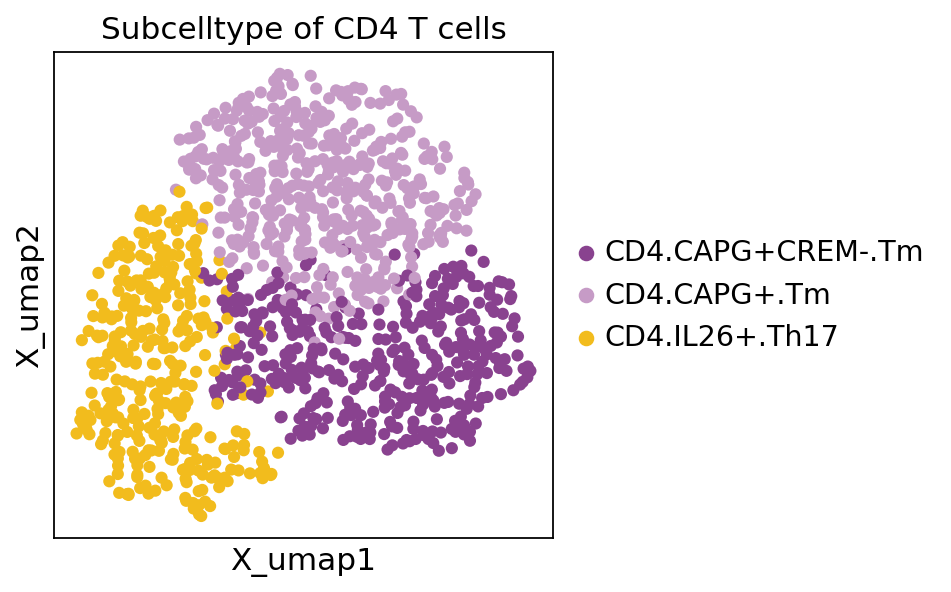

In [174]:
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.embedding(adata_Th17,basis='X_umap',frameon='small',title='Subcelltype of CD4 T cells',
                color=['Subcelltype'],show=False,ax=ax,size=120)
plt.savefig("Gastric/Figure/sFigure11/sFigure11_E.png",dpi=300,bbox_inches = 'tight')

In [ ]:
v0 = ov.single.pyVIA(adata=adata_Th17,adata_key='X_scVI',adata_ncomps=80, basis='X_umap',too_big_factor=1,small_pop=50, #new parameter
                    resolution_parameter=0.4,clusters='Subcelltype',knn=30,random_seed=4,root_user=['CD4.CAPG+.Tm'],)
v0.run()

v0.get_pseudotime()

In [ ]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='Subcelltype',draw_all_curves=False,cmap_pseudotime ='viridis')
fig.savefig("Gastric/Figure/sFigure11/sFigure11_F.png",dpi=300,bbox_inches = 'tight')

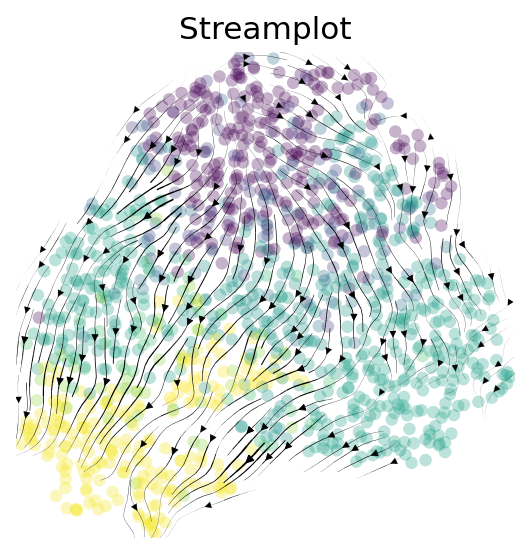

In [178]:
fig,ax=v0.plot_stream(basis='X_umap',density_grid=0.8, scatter_size=30, color_scheme='time', linewidth=0.5,
                             min_mass = 1, cutoff_perc = 5, scatter_alpha=0.3, marker_edgewidth=0.1,cmap_str='viridis',
                             density_stream = 2, smooth_transition=1, smooth_grid=0.5)
fig.savefig("Gastric/Figure/sFigure11/sFigure11_G.png",dpi=300,bbox_inches = 'tight')

In [ ]:
v0.adata = adata_Treg.raw.to_adata()
gene_list_magic = ['CCL20','IL7R','S100A10','S100A11','ANXA1','IL17F','IL17A','CTLA4','LAG3','CSF1','TOX2','DUSP4','TRBV27','SIRPG',]
fig,ax=v0.plot_gene_trend_heatmap(gene_list=gene_list_magic,figsize=(6,4),fontsize=12,cmap='Spectral_r',
                          marker_lineages=[3])
fig.savefig("Gastric/Figure/sFigure11/sFigure11_H.png",dpi=300,bbox_inches = 'tight')